In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# Import data from csv.
df = pd.read_csv('./RegressionData.csv', encoding="UTF-8")
EDAdf = df.copy()
EDAdf.dtypes

Gearing                   float64
Gearing_Long              float64
Asset_Tangability         float64
Size                      float64
Growth_Opportunities      float64
Profitability             float64
Non_Debt_Tax_Shields      float64
Ownership_Concentrated      int64
dtype: object

In [25]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
EDAdf.describe()

,Gearing,Gearing_Long,Asset_Tangability,Size,Growth_Opportunities,Profitability,Non_Debt_Tax_Shields,Ownership_Concentrated
count,7854.000,7854.000,7854.000,7854.000,7854.000,7854.000,7854.000,7854.000
mean,86.803,12.458,0.419,10.036,8.068,10.724,0.034,0.702
std,89.789,12.582,0.251,1.153,9.545,9.051,0.026,0.457
min,2.720,0.078,0.024,7.501,-12.117,-0.423,0.001,0.000
25%,24.950,2.584,0.213,9.294,1.807,4.497,0.014,0.000
50%,56.190,8.125,0.385,9.832,6.482,8.215,0.027,1.000
75%,115.660,18.268,0.610,10.623,12.733,14.021,0.046,1.000
max,524.210,56.167,0.947,13.816,45.883,60.193,0.129,1.000


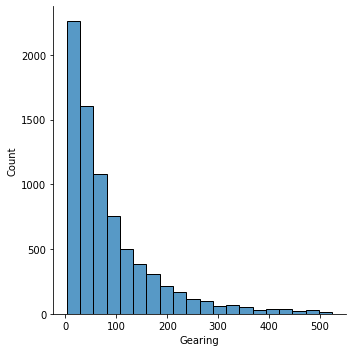

In [26]:
sns.displot(EDAdf["Gearing"], kde=False, bins=20)

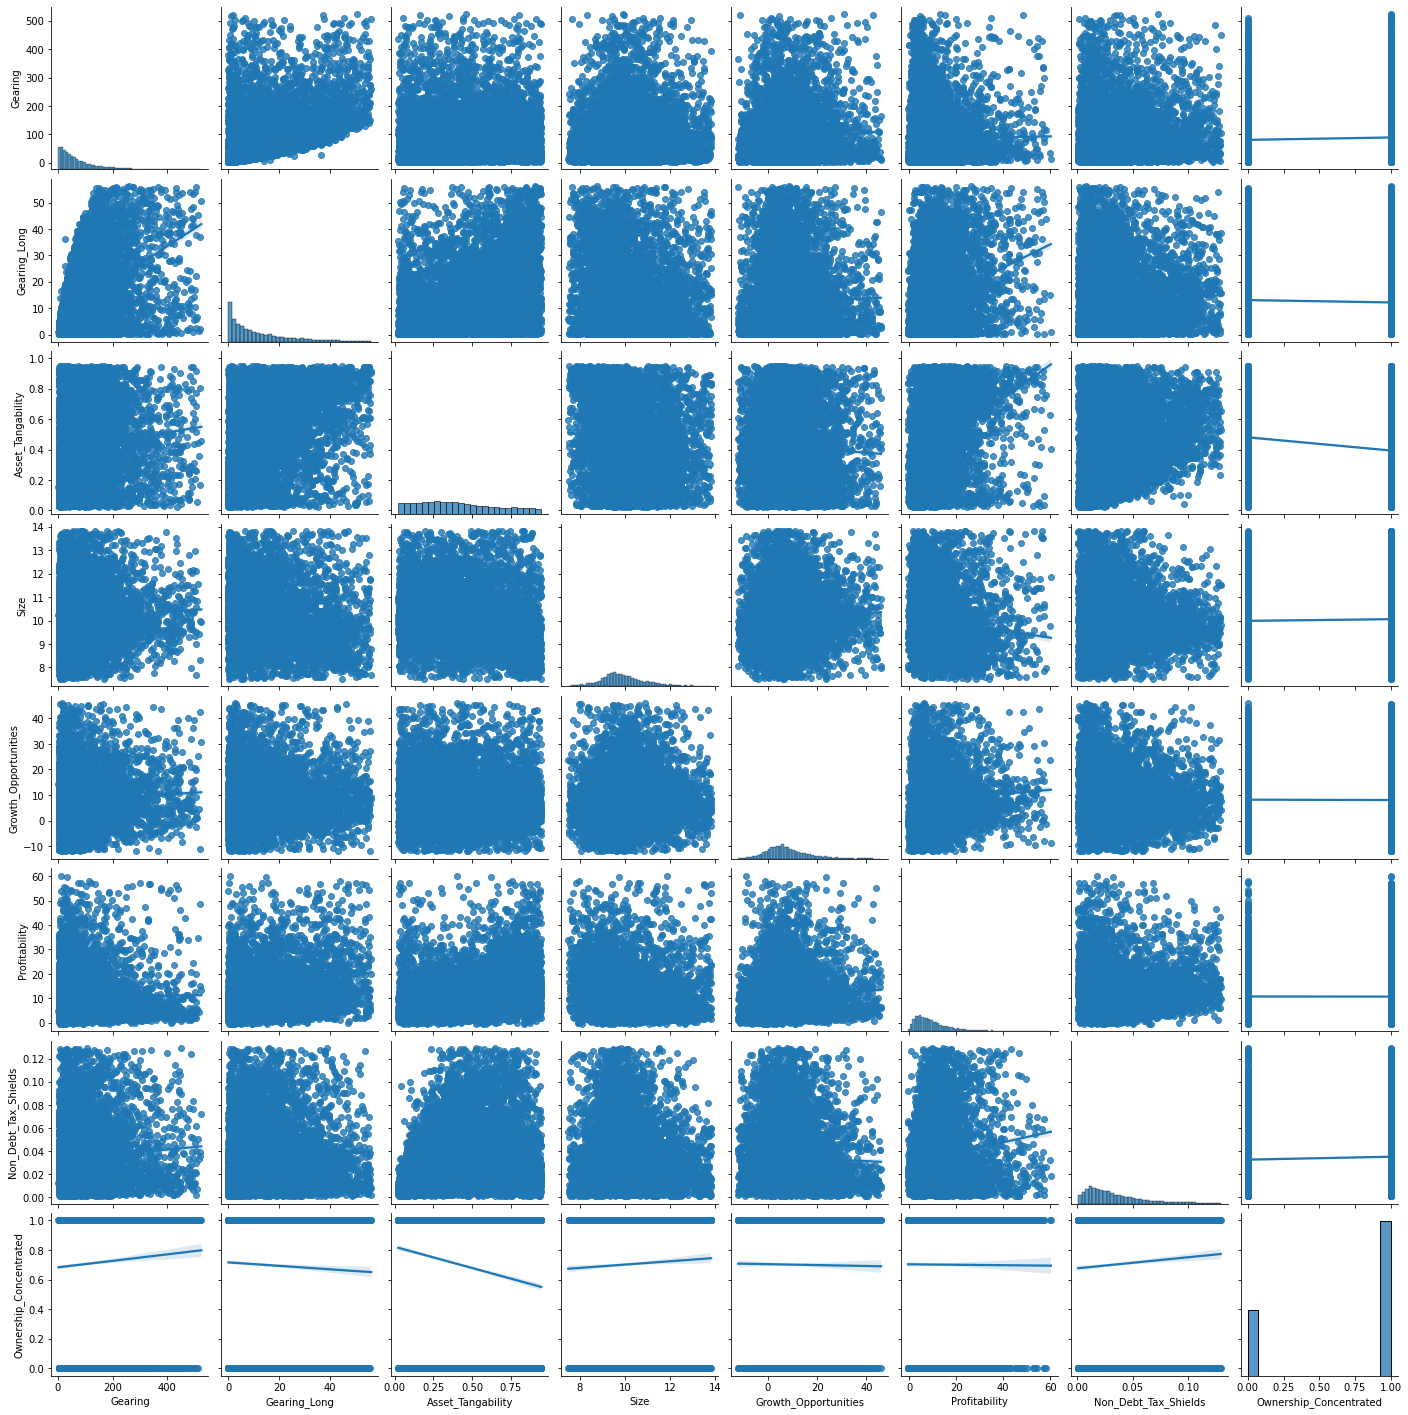

In [27]:
sns.pairplot(EDAdf, kind="reg", )

<AxesSubplot:>

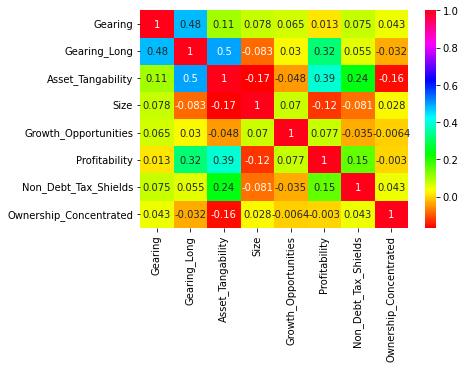

In [28]:
# correlation heatmap
corr = EDAdf.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="hsv", annot=True)

<AxesSubplot:xlabel='Ownership_Concentrated', ylabel='Gearing'>

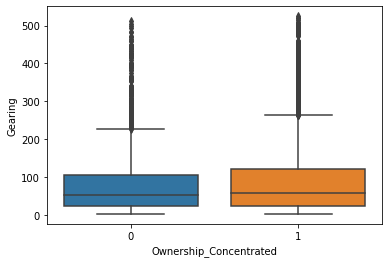

In [29]:
sns.boxplot(x="Ownership_Concentrated", y="Gearing", data=EDAdf)